In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.constants import hbar

In [136]:
# Define Constants
Omega0 = 2*np.pi*100e3
eta = 0.15
N = 2  #Number of ions
n = 10 #Number of motion states
eps = 2*eta*Omega0
nu = 2*np.pi*1e6
deltaB = eps
deltaR = -eps

final_time = 4*np.pi/eps
t=np.linspace(0,final_time,10000)

e  = Qobj([[0,0],[0,1]])
g  = Qobj([[1,0],[0,0]])

ee = tensor(e, e, qeye(n))
eg = tensor(e, g,qeye(n))
ge = tensor(g, e, qeye(n))
gg = tensor(g, g, qeye(n))

cons = eta*Omega0/2

#Sigma_minus and Sigma_plus Operators
SM = tensor(sigmam(),qeye(N))+tensor(qeye(N),sigmam())
SP = tensor(sigmap(),qeye(N))+tensor(qeye(N),sigmap())

# Blue SB term
Hb1 = 1j*cons*tensor(SM,destroy(n))
Hb2 = -1j*cons*tensor(SP,create(n))

# Red SB Terms
Hr1 = 1j*cons*tensor(SM,create(n))
Hr2 = -1j*cons*tensor(SP,destroy(n))

#Time Dependence of Hamiltonian
def Hb1_coeff(t,args):
    return np.exp(1j*deltaB*t)
def Hb2_coeff(t,args):
    return np.exp(-1j*deltaB*t)
def Hr1_coeff(t,args):
    return np.exp(1j*deltaR*t)
def Hr2_coeff(t,args):
    return np.exp(-1j*deltaR*t)

# Total Hamiltonian
H = [[Hb1,Hb1_coeff],[Hb2,Hb2_coeff],[Hr1,Hr1_coeff],[Hr2,Hr2_coeff]]

#Initial State
# psi0 = tensor(e,e, thermal_dm(n,n))
psi0 = tensor(e,e, fock_dm(n,1))

e_ops = [ee*ee.dag(), eg*eg.dag(), ge*ge.dag(), gg*gg.dag()]

# Solve part a)
options = Options(nsteps=1000000)
output1 = mesolve(H, psi0, t, e_ops= e_ops, options=options)

# Solve part b)
eps = 2*eta*Omega0
nu = 2*np.pi*1e6
deltaB = 0.95*eps
deltaR = -eps

H = [[Hb1,Hb1_coeff],[Hb2,Hb2_coeff],[Hr1,Hr1_coeff],[Hr2,Hr2_coeff]]
output2 = mesolve(H, psi0, t, e_ops= e_ops, options=options)

# Solve part c)
eps = 2*eta*Omega0
nu = 1000
deltaB = nu + 1.05*eps
deltaR = -nu - 0.95*eps

H = [[Hb1,Hb1_coeff],[Hb2,Hb2_coeff],[Hr1,Hr1_coeff],[Hr2,Hr2_coeff]]
output3 = mesolve(H, psi0, t, e_ops= e_ops, options=options)

# Solve part d)
eps = 2*eta*Omega0
nu = 100
deltaB = nu + 1.05*eps
deltaR = -nu - 1.05*eps

H = [[Hb1,Hb1_coeff],[Hb2,Hb2_coeff],[Hr1,Hr1_coeff],[Hr2,Hr2_coeff]]
output4 = mesolve(H, psi0, t, e_ops= e_ops, options=options)

# Solve part d)
eps = 2*eta*Omega0
nu = 10
deltaB = nu + 1.05*eps
deltaR = -nu - 1.05*eps

H = [[Hb1,Hb1_coeff],[Hb2,Hb2_coeff],[Hr1,Hr1_coeff],[Hr2,Hr2_coeff]]
output5 = mesolve(H, psi0, t, e_ops= e_ops, options=options)

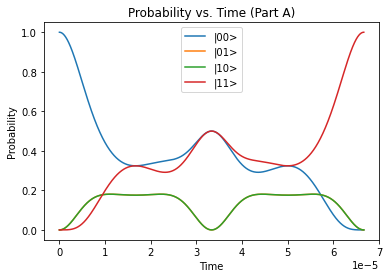

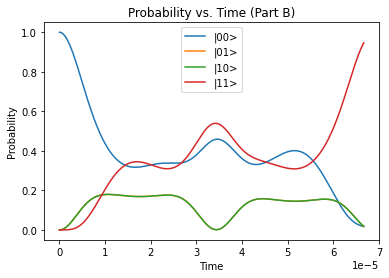

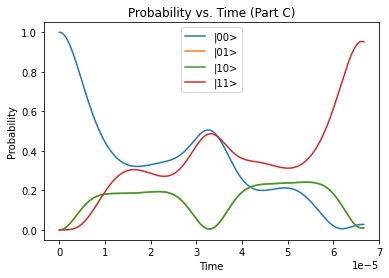

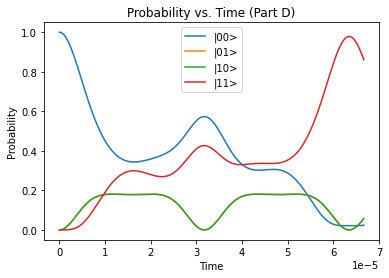

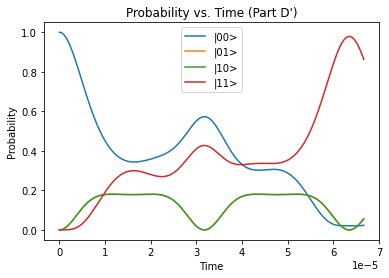

In [138]:
#Plot
# plt.figure(1,(2,2),dpi=300)
plt.title("Probability vs. Time (Part A)")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.plot(t, output1.expect[0], label = "|00>")
plt.plot(t, output1.expect[1], label = "|01>")
plt.plot(t, output1.expect[2], label = "|10>")
plt.plot(t, output1.expect[3], label = "|11>")
plt.legend()
plt.show()

plt.title("Probability vs. Time (Part B)")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.plot(t, output2.expect[0], label = "|00>")
plt.plot(t, output2.expect[1], label = "|01>")
plt.plot(t, output2.expect[2], label = "|10>")
plt.plot(t, output2.expect[3], label = "|11>")
plt.legend()
plt.show()

plt.title("Probability vs. Time (Part C)")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.plot(t, output3.expect[0], label = "|00>")
plt.plot(t, output3.expect[1], label = "|01>")
plt.plot(t, output3.expect[2], label = "|10>")
plt.plot(t, output3.expect[3], label = "|11>")
plt.legend()
plt.show()

plt.title("Probability vs. Time (Part D)")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.plot(t, output4.expect[0], label = "|00>")
plt.plot(t, output4.expect[1], label = "|01>")
plt.plot(t, output4.expect[2], label = "|10>")
plt.plot(t, output4.expect[3], label = "|11>")
plt.legend()
plt.show()

plt.title("Probability vs. Time (Part D')")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.plot(t, output5.expect[0], label = "|00>")
plt.plot(t, output5.expect[1], label = "|01>")
plt.plot(t, output5.expect[2], label = "|10>")
plt.plot(t, output5.expect[3], label = "|11>")
plt.legend()
plt.show()

### Part e)

It seems that when we vary the trap frequency $\nu$ we do not see as significant a change (Last two plots) as if we were to vary $\epsilon$ or the laser frequencies.  Those seem to have a significant amount of change on the gate.  The assymetric de-tuning had a much more drastic impact than the symmetric det-tuning.  From these plots, I seem less worried about the trap frequency and more concerned with the laser frequency and laser amplitude.  In the end, I believe that the drift in laser frequency is the most worrisome as it appears to have the biggest impact on the system.